# Assignment 8.2

I decided to treat this as a classification problem by creating a new binary variable affair
(did the woman have at least one affair?) and trying to predict the classification for each
woman.<br>
Dataset<br>
The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived
from a survey of women in 1974 by Redbook magazine, in which married women were
asked about their participation in extramarital affairs. More information about the study
is available in a 1978 paper from the Journal of Political Economy.<br>
Description of Variables<br>
The dataset contains 6366 observations of 9 variables:<br>
rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)<br>
age: woman's age<br>
yrs_married: number of years married<br>
children: number of children<br>
religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)<br>
educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 =
college graduate, 17 = some graduate school, 20 = advanced degree)<br>
occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 =
"white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)<br>
occupation_husb: husband's occupation (same coding as above)<br>
affairs: time spent in extra-marital affairs<br>
Code to loading data and modules<br>
import numpy as np<br>
import pandas as pd<br>
import statsmodels.api as sm<br>
import matplotlib.pyplot as plt<br>
from patsy import dmatrices<br>
from sklearn.linear_model import LogisticRegression<br>
from sklearn.cross_validation import train_test_split<br>
from sklearn import metrics<br>
from sklearn.cross_validation import cross_val_score<br>
dta = sm.datasets.fair.load_pandas().data
<br>
/# add "affair" column: 1 represents having affairs, 0 represents not<br>
dta['affair'] = (dta.affairs > 0).astype(int)<br>
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")<br>
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',<br>
'C(occupation)[T.3.0]':'occ_3',<br>
'C(occupation)[T.4.0]':'occ_4',<br>
'C(occupation)[T.5.0]':'occ_5',<br>
'C(occupation)[T.6.0]':'occ_6',<br>
'C(occupation_husb)[T.2.0]':'occ_husb_2',<br>
'C(occupation_husb)[T.3.0]':'occ_husb_3',<br>
'C(occupation_husb)[T.4.0]':'occ_husb_4',<br>
'C(occupation_husb)[T.5.0]':'occ_husb_5',<br>
'C(occupation_husb)[T.6.0]':'occ_husb_6'})<br>
y = np.ravel(y)<br>

<h2>Solution</h2>

<h3>Data Preparation</h3>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

print(x_train.shape,x_test.shape)

c:\python35\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
c:\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(5729, 17) (637, 17)


<h3>Data Visualization</h3>

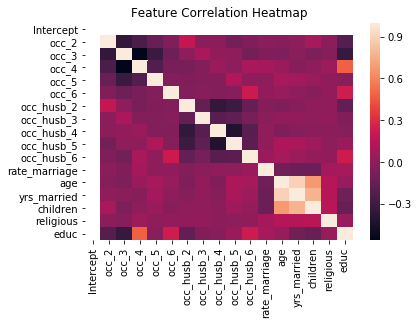

In [2]:
sns.heatmap(X.corr())
plt.title("Feature Correlation Heatmap")
plt.show()

The correlation graph shows correlations between data features on a scale of 0 to 1

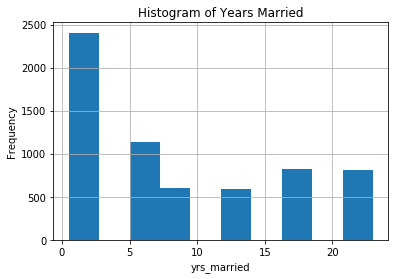

In [40]:
dta.yrs_married.hist()
plt.title('Histogram of Years Married')
plt.xlabel('yrs_married')
plt.ylabel('Frequency')
plt.show()

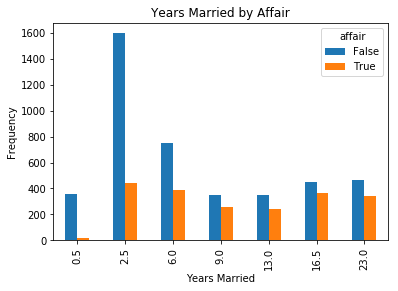

In [41]:
pd.crosstab(dta.yrs_married, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Years Married by Affair')
plt.xlabel('Years Married')
plt.ylabel('Frequency')
plt.show()

We can conclude that since the number of women having an affair and not having an affair is evenly distributed across years married, the affair variable is not strongly dependent on years_married.

<h3>Training the Model</h3>

In [2]:
model = LogisticRegression()
model.fit(x_train,y_train)
scores = cross_val_score(model,x_train,y_train,scoring='accuracy',cv=10)
df = pd.DataFrame()
df['feature_names'] = X.columns
df['coefficients'] = model.coef_.reshape(17,1)
print(df)
print("Mean accuracy for 10-fold cross-validation is " + str(scores.mean()))

    feature_names  coefficients
0       Intercept      1.524051
1           occ_2      0.104959
2           occ_3      0.430650
3           occ_4      0.172103
4           occ_5      0.749690
5           occ_6      0.878301
6      occ_husb_2      0.134591
7      occ_husb_3      0.242341
8      occ_husb_4      0.137242
9      occ_husb_5      0.171129
10     occ_husb_6      0.169433
11  rate_marriage     -0.709219
12            age     -0.053502
13    yrs_married      0.101887
14       children      0.015706
15      religious     -0.353737
16           educ     -0.001875
Mean accuracy for 10-fold cross-validation is 0.7227958820220344


In [3]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matr = confusion_matrix(y_test,y_pred)
print(confusion_matr)

[[391  47]
 [122  77]]


The model coefficients are printed above, along with mean accuracy on 10 fold cross-validation. The confusion matrix on a test set is given above.